In [9]:
import requests
from pandas import DataFrame
import re
from datetime import datetime
import os

from openpyxl.workbook import Workbook
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver import ChromeOptions
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from tqdm import tqdm
import re
import pickle
import csv
from pandas import DataFrame 
import numpy as np
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import time
import os
import time
from collections import defaultdict
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import utils


# 웹 스크래핑하고 영어가 아닌 리뷰 또는 중복되는 리뷰 날리고 이걸 시작해야함

warnings.simplefilter(action='ignore')
 
# # row 생략 없이 출력
# pd.set_option('display.max_rows', 100)
# # col 생략 없이 출력
# pd.set_option('display.max_columns', 100)

In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import urllib.request

searchKey = input('검색 키워드 입력:')

driver = webdriver.Chrome()
driver.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&authuser=0&ogbl")
elem = driver.find_element("name", "q")

elem.send_keys(searchKey)
elem.send_keys(Keys.RETURN)

In [12]:
SCROLL_PAUSE_TIME = 10
# Get scroll height
tmp = 1
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        try:
            if tmp == 1:
                driver.find_element(By.CSS_SELECTOR, ".r0zKGf").click()
                tmp = tmp + 1
            else:
                driver.find_element(By.CSS_SELECTOR, ".mye4qd").click()            
        except:
            break
    last_height = new_height



e :  Message: element click intercepted: Element <img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="225" height="225" alt="소녀 만화에 의해 시연 된 쟁기 할라사나 요가 포즈 쟁기자세에 대한 스톡 벡터 아트 및 기타 이미지 - 쟁기자세, 요가, 고대의 -  iStock" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7en_arTkvCiC3Xvz_EyXZFYr9X_N2TnNqfQ&amp;usqp=CAU"> is not clickable at point (137, 661). Other element would receive the click: <div jsname="r5xl4" class="islrc" style="width: 682px;">...</div>
  (Session info: chrome=113.0.5672.126)
Stacktrace:
0   chromedriver                        0x000000010043f8ac chromedriver + 4257964
1   chromedriver                        0x0000000100437f40 chromedriver + 4226880
2   chromedriver                        0x00000001000749d4 chromedriver + 281044
3   chromedriver                        0x00000001000b6134 chromedriver + 549172
4   chromedriver                        0x00000001000b4094 chromedriver + 540820
5   chromedriver                     
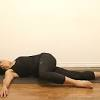

In [13]:
images = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
count = 1
for image in images:
    try:
      
        image.click()
        time.sleep(10)
        imgUrl = driver.find_element(
            By.XPATH,
            '//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div/div/div[3]/div[1]/a/img[1]'
        ).get_attribute("src")
        if imgUrl == None:
            continue
        opener = urllib.request.build_opener()
        opener.addheaders = [
            ('User-Agent',
             'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')
        ]
        urllib.request.install_opener(opener)
        urllib.request.urlretrieve(imgUrl, f'./imgs/{searchKey}{str(count)}.jpg')
        count = count + 1
    except Exception as e:
        print('e : ', e)
        pass